In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from warnings import filterwarnings
filterwarnings('ignore')
# Load the uploaded CSV files
# transactions_path = 'https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view'
# products_path = 'https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view'
# customers_path = 'https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view'

In [62]:
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [63]:
transactions_head = transactions.head(5)
products_head = products.head(5)
customers_head = customers.head(5)

In [64]:
print(transactions_head)

  TransactionID CustomerID ProductID  ... Quantity  TotalValue   Price
0        T00001      C0199      P067  ...        1      300.68  300.68
1        T00112      C0146      P067  ...        1      300.68  300.68
2        T00166      C0127      P067  ...        1      300.68  300.68
3        T00272      C0087      P067  ...        2      601.36  300.68
4        T00363      C0070      P067  ...        3      902.04  300.68

[5 rows x 7 columns]


In [65]:
print(products_head)

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [66]:
print(customers_head)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [67]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [68]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [69]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [70]:
transactions_description = transactions.describe(include='all')
products_description = products.describe(include='all')
customers_description = customers.describe(include='all')

In [71]:
transactions_description

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00001,C0109,P059,2024-08-25 12:38:23,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [72]:
products_description

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [73]:
customers_description

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [74]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], format='%Y-%m-%d')

In [75]:
transactions = transactions.drop_duplicates()
products = products.drop_duplicates()
customers = customers.drop_duplicates()

In [76]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [77]:
products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [78]:
customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


Transactions Dataset
Rows: 1000
Columns: 7 (TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price)
Observations:
All columns are complete (no missing values).
TransactionDate is currently stored as a string; converting it to a datetime format is recommended for better analysis.
Quantity ranges from 1 to 4.
The average TotalValue is approximately 689.99, with a maximum of 1991.04.

Products Dataset
Rows: 100
Columns: 4 (ProductID, ProductName, Category, Price)
Observations:
No missing values.
4 unique categories: "Books," "Electronics," "Home Decor," "Clothing."
Prices range from 16.08 to 497.76, with an average of 267.55.

Customers Dataset
Rows: 200
Columns: 4 (CustomerID, CustomerName, Region, SignupDate)
Observations:
No missing values.
4 unique regions: "South America," "Asia," and two others.
SignupDate is a string; converting it to datetime format is suggested.

In [79]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [80]:
merged_summary = merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [81]:
merged_description = merged_data.describe(include='all')
merged_description

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000,1000,1000,1000,1000,1000,1000.00000
unique,1000,199,100,NaN,NaN,NaN,NaN,199,4,NaN,66,4,NaN
top,T00001,C0109,P059,NaN,NaN,NaN,NaN,Abigail Jones,South America,NaN,ActiveWear Smartwatch,Books,NaN
freq,1,11,19,NaN,NaN,NaN,NaN,11,304,NaN,40,270,NaN
mean,NaN,NaN,NaN,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,NaN,NaN,2023-07-09 02:49:55.199999744,NaN,NaN,272.55407
min,NaN,NaN,NaN,2023-12-30 15:29:12,1.000000,16.080000,16.08000,NaN,NaN,2022-01-22 00:00:00,NaN,NaN,16.08000
25%,NaN,NaN,NaN,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,NaN,NaN,2022-09-17 12:00:00,NaN,NaN,147.95000
50%,NaN,NaN,NaN,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,NaN,NaN,2023-07-23 00:00:00,NaN,NaN,299.93000
75%,NaN,NaN,NaN,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,NaN,NaN,2024-04-12 00:00:00,NaN,NaN,404.40000
max,NaN,NaN,NaN,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,NaN,NaN,2024-12-28 00:00:00,NaN,NaN,497.76000


In [82]:
missing_values = merged_data.isnull().sum()
missing_values

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [83]:
merged_head = merged_data.head()
merged_head

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Cleaned and Merged Dataset Summary
Rows: 1000

Columns: 13

Columns Overview:

Includes transaction details (TransactionID, TransactionDate, Quantity, TotalValue, etc.), customer attributes (CustomerID, CustomerName, Region, SignupDate), and product attributes (ProductID, ProductName, Category, Price).
No Missing Values: All columns are complete.

Date Columns: Successfully converted TransactionDate and SignupDate to datetime format.

Key Insights from the Dataset:
Quantity: Most transactions involve quantities of 2 or more.
Region: Customers are mostly from "South America," followed by other regions.
Category: Popular product categories include "Books" (270 instances) and "Electronics."
Price: Product prices range between 16.08 and 497.76.

In [84]:
# Analyzing Customer Purchase Patterns

# Purchases by Region
region_purchases = merged_data['Region'].value_counts()
region_spending = merged_data.groupby('Region')['TotalValue'].sum()

In [85]:
# Frequency of Purchases by Customer
customer_frequency = merged_data['CustomerID'].value_counts()

In [86]:
# Spending by Customer
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum()

In [87]:
# Explore Product Trends
# Popular Categories
category_popularity = merged_data['Category'].value_counts()
category_spending = merged_data.groupby('Category')['TotalValue'].sum()

In [88]:
# Average Price per Category
category_avg_price = merged_data.groupby('Category')['Price_y'].mean()

In [89]:
# Time-based Trends
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

In [90]:
# Results
(region_purchases, region_spending, customer_frequency.head(), customer_spending.head(),
 category_popularity, category_spending, category_avg_price, monthly_sales)

(Region
 South America    304
 North America    244
 Europe           234
 Asia             218
 Name: count, dtype: int64,
 Region
 Asia             152074.97
 Europe           166254.63
 North America    152313.40
 South America    219352.56
 Name: TotalValue, dtype: float64,
 CustomerID
 C0109    11
 C0156    11
 C0141    10
 C0175    10
 C0065    10
 Name: count, dtype: int64,
 CustomerID
 C0001    3354.52
 C0002    1862.74
 C0003    2725.38
 C0004    5354.88
 C0005    2034.24
 Name: TotalValue, dtype: float64,
 Category
 Books          270
 Electronics    254
 Home Decor     248
 Clothing       228
 Name: count, dtype: int64,
 Category
 Books          192147.47
 Clothing       166170.66
 Electronics    180783.50
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 Category
 Books          280.526222
 Clothing       283.104254
 Electronics    288.722008
 Home Decor     237.616250
 Name: Price_y, dtype: float64,
 TransactionDate
 2023-12     3769.52
 2024-01    66376.39
 20

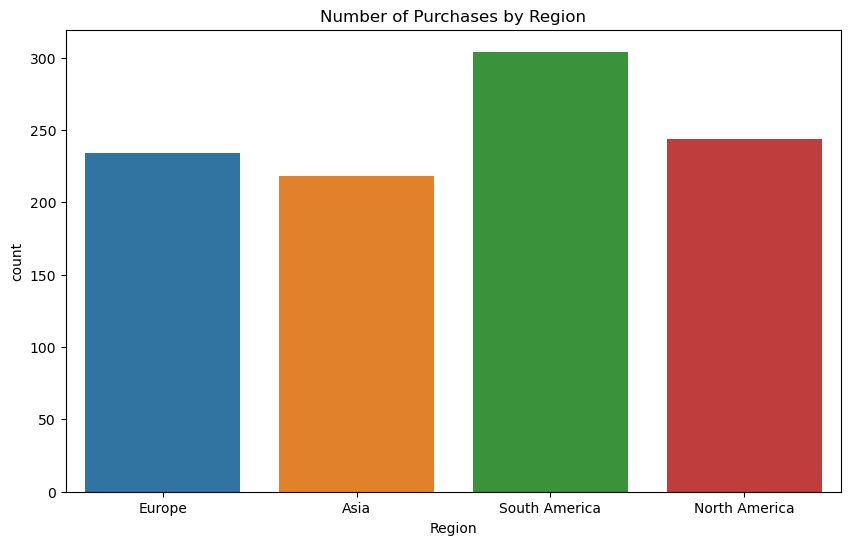

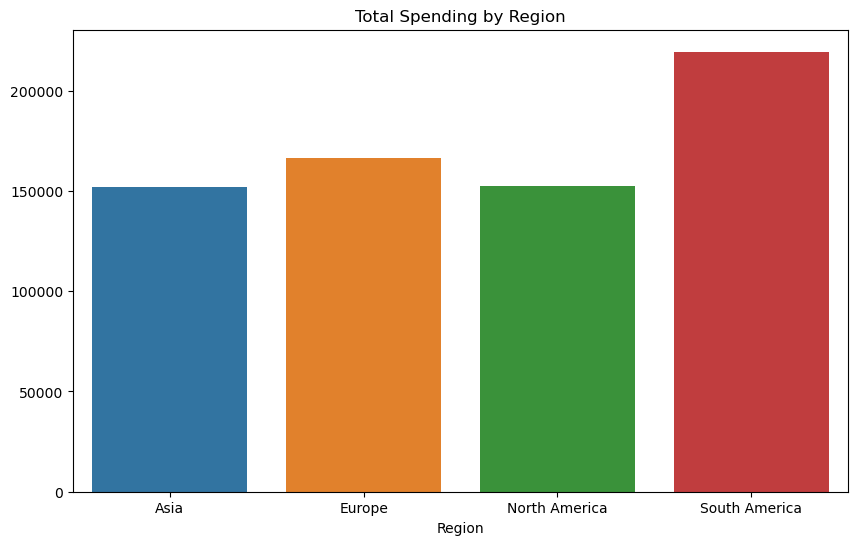

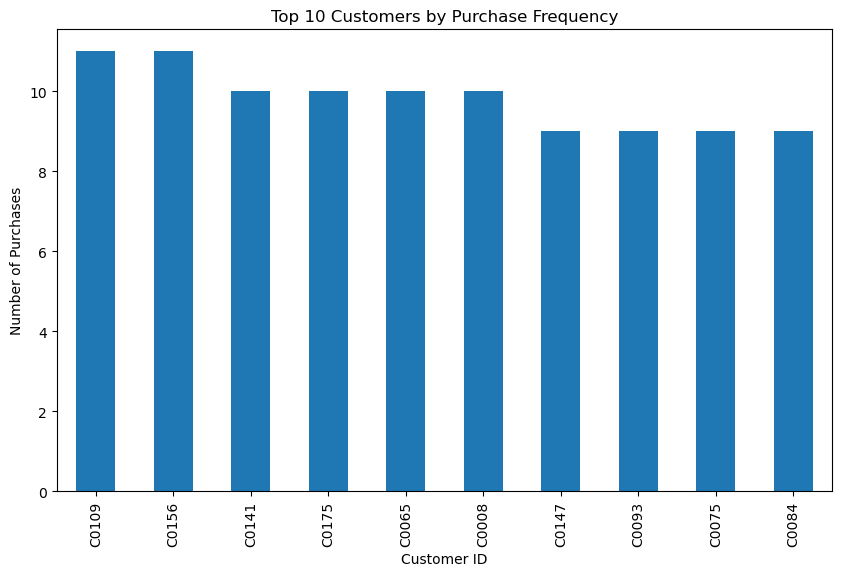

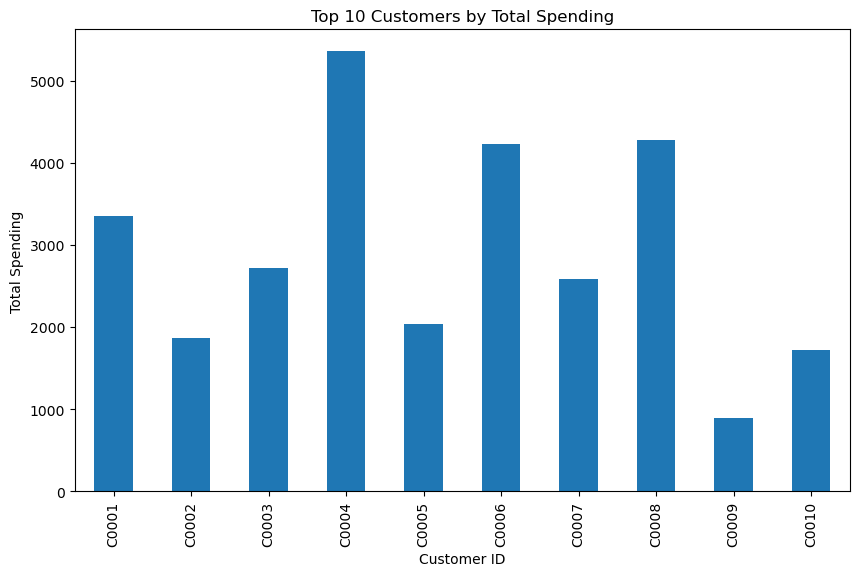

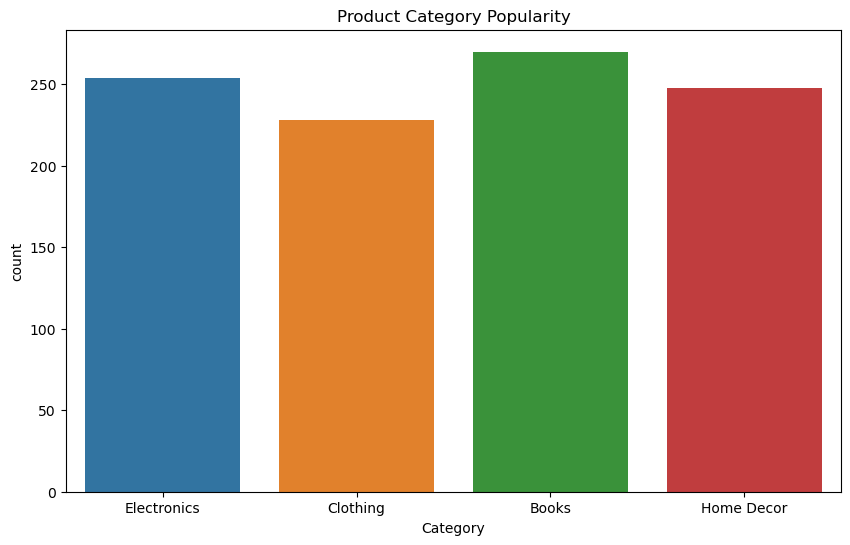

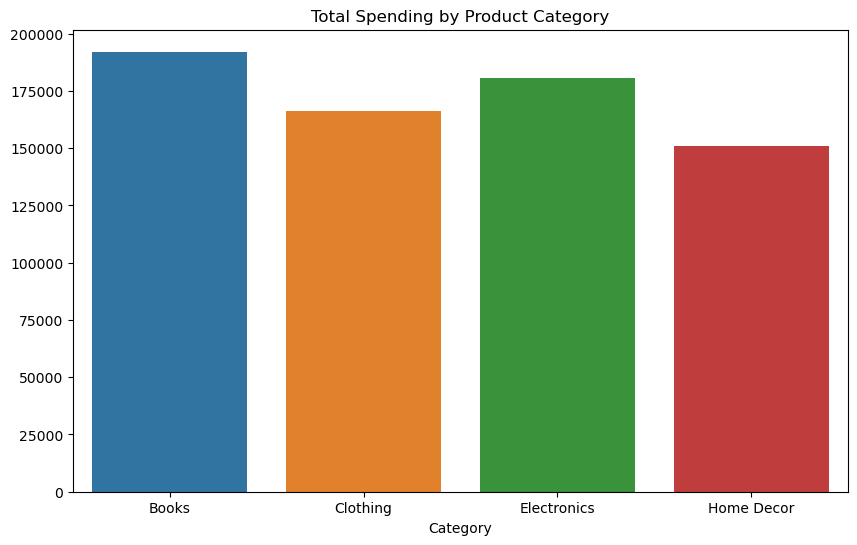

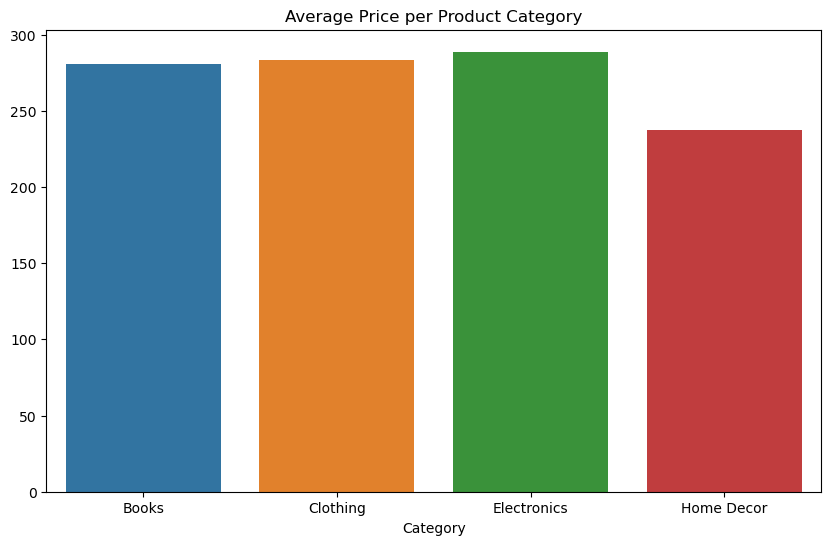

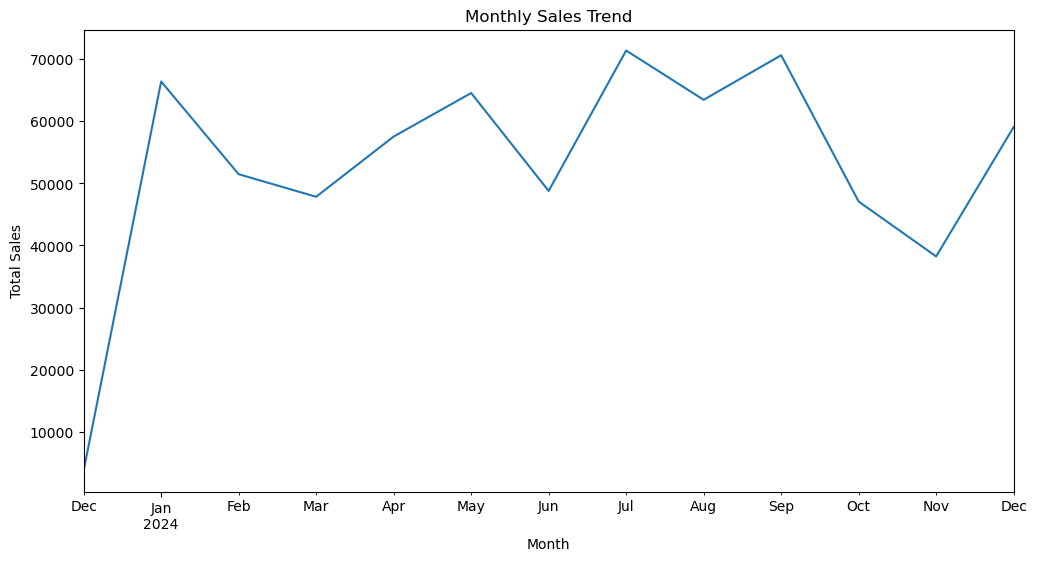

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Purchase Patterns
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=merged_data)
plt.title('Number of Purchases by Region')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_spending.index, y=region_spending.values)
plt.title('Total Spending by Region')
plt.show()

plt.figure(figsize=(10, 6))
customer_frequency.head(10).plot(kind='bar')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()

plt.figure(figsize=(10, 6))
customer_spending.head(10).plot(kind='bar')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


# Product Trends
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=merged_data)
plt.title('Product Category Popularity')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_spending.index, y=category_spending.values)
plt.title('Total Spending by Product Category')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_price.index, y=category_avg_price.values)
plt.title('Average Price per Product Category')
plt.show()

# Time-based Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

Customer Purchase Patterns
Purchases by Region:

South America leads with 304 purchases, followed by North America (244), Europe (234), and Asia (218).
Total Spending by Region:
South America: $219,352.56
Europe: $166,254.63
North America: $152,313.40
Asia: $152,074.97
Customer Frequency:

The top customer (ID: C0109) made 11 purchases.
Frequent customers typically made 10–11 purchases.
Customer Spending:

The highest spending customer (ID: C0004) spent $5,354.88.
Top spenders contribute significantly to total revenue.
Product Trends
Popular Categories:

Books (270 purchases) and Electronics (254) dominate.
Clothing (228) and Home Decor (248) are also popular.
Spending by Category:

Books: $192,147.47
Electronics: $180,783.50
Clothing: $166,170.66
Home Decor: $150,893.93
Average Price per Category:

Electronics: $288.72 (highest average price)
Home Decor: $237.62 (lowest average price)

In [108]:
merged_data
merged_data.to_csv('merged_datasets.csv', index=False)